# K-Means 군집화 Lab1

1. boston_housing.csv 파일을 읽어서 boston_df를 만드시오.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston_df = pd.read_csv('../../data/boston_housing.csv')
boston_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
boston_scaled = MinMaxScaler().fit_transform(boston_df.drop('medv',axis=1))
boston_scaled_df=pd.DataFrame(data= boston_scaled,columns=boston_df.columns[:-1])

In [4]:
boston_scaled_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [5]:
# Clustering
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300,random_state=0).fit(boston_scaled_df)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
boston_df['cluster']=kmeans.labels_

[1 1 1 1 1 1 1 4 4 1 4 1 1 1 4 1 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1
 1 1 3 3 1 1 1 1 1 1 1 4 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1
 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 5 5 5 5 5
 5 5 5 5 6 5 6 6 5 5 5 5 6 5 6 6 5 5 5 5 5 5 5 5 4 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 4 6 6 6 6 6 1 1 1 6 4 6 6 6 6
 6 1 1 1 1 1 1 1 1 1 1 1 6 1 6 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 3 3 3 5 5
 5 5 5 5 5 5 5 5 5 1 6 1 1 1 6 6 1 6 6 1 1 1 1 6 3 3 3 3 3 3 3 3 3 3 1 1 1
 1 1 3 3 3 1 3 3 1 1 1 1 4 4 1 1 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 1 1 1 1 1 1 1 1 3 1 3 3 1 1 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 4 4 4 4 4 

In [6]:
boston_scaled_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [7]:
# Cluster Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(boston_scaled_df)

boston_df['pca_x'] = pca_transformed[:,0]
boston_df['pca_y'] = pca_transformed[:,1]
boston_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster,pca_x,pca_y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,-0.569012,0.156242
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,-0.438729,0.251987
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,-0.539440,0.142728


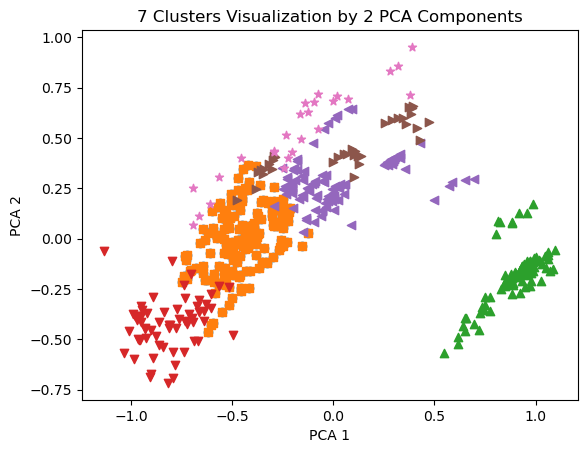

In [8]:
# Plotting
# Index extraction per cluster
marker0_ind = boston_df[boston_df['cluster']==1].index
marker1_ind = boston_df[boston_df['cluster']==1].index
marker2_ind = boston_df[boston_df['cluster']==2].index
marker3_ind = boston_df[boston_df['cluster']==3].index
marker4_ind = boston_df[boston_df['cluster']==4].index
marker5_ind = boston_df[boston_df['cluster']==5].index
marker6_ind = boston_df[boston_df['cluster']==6].index

# Using different markerts per each cluster
plt.scatter(x=boston_df.loc[marker0_ind,'pca_x'], y=boston_df.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=boston_df.loc[marker1_ind,'pca_x'], y=boston_df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=boston_df.loc[marker2_ind,'pca_x'], y=boston_df.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=boston_df.loc[marker3_ind,'pca_x'], y=boston_df.loc[marker3_ind,'pca_y'], marker='v') 
plt.scatter(x=boston_df.loc[marker4_ind,'pca_x'], y=boston_df.loc[marker4_ind,'pca_y'], marker='<')
plt.scatter(x=boston_df.loc[marker5_ind,'pca_x'], y=boston_df.loc[marker5_ind,'pca_y'], marker='>')
plt.scatter(x=boston_df.loc[marker6_ind,'pca_x'], y=boston_df.loc[marker6_ind,'pca_y'], marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('7 Clusters Visualization by 2 PCA Components')
plt.show()

In [9]:
boston_df.groupby(['cluster'])['medv'].mean()

cluster
0    12.900000
1    25.581761
2    17.668041
3    29.429032
4    18.448387
5    27.470588
6    26.711538
Name: medv, dtype: float64

Text(0, 0.5, 'medv')

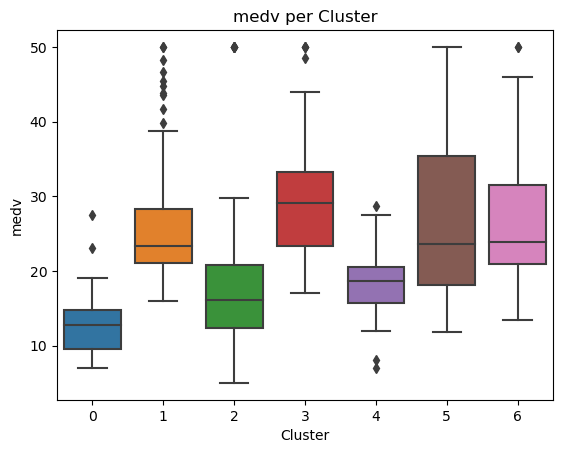

In [10]:
# Box plot for cluster comparison

import seaborn as sns
g=sns.boxplot(data=boston_df,y='medv',x='cluster')
g.set_title('medv per Cluster')
g.set_xlabel('Cluster')
g.set_ylabel('medv')

In [11]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster,pca_x,pca_y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,5.060000e+02
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,2.444664,3.148009e-16,4.684439e-17
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,1.638008,6.453095e-01,3.125804e-01
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000,-1.132454e+00,-7.166013e-01
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,1.000000,-5.004016e-01,-2.271708e-01
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,2.000000,-2.029696e-01,-3.231621e-02
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,4.000000,6.530171e-01,2.276291e-01
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,6.000000,1.259115e+00,9.525425e-01


In [12]:
boston_df[boston_df['cluster']==2].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster,pca_x,pca_y
count,97.000000,97.0,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.0,9.700000e+01,97.000000,97.000000,97.000000,97.0,97.000000,97.000000
mean,11.465087,0.0,1.810000e+01,0.082474,0.674433,6.002722,89.689691,2.087565,24.0,666.0,2.020000e+01,371.951856,17.732165,17.668041,2.0,0.905445,-0.178195
std,12.174768,0.0,3.214053e-14,0.276515,0.062663,0.730550,13.513292,0.687601,0.0,0.0,3.214053e-14,35.154386,6.988702,9.293720,0.0,0.116314,0.134649
min,2.378570,0.0,1.810000e+01,0.000000,0.532000,3.561000,40.300000,1.129600,24.0,666.0,2.020000e+01,240.520000,2.960000,5.000000,2.0,0.547283,-0.567173
25%,5.201770,0.0,1.810000e+01,0.000000,0.631000,5.648000,87.600000,1.533100,24.0,666.0,2.020000e+01,355.290000,13.340000,12.300000,2.0,0.863389,-0.223204
50%,8.055790,0.0,1.810000e+01,0.000000,0.693000,6.162000,95.300000,1.926500,24.0,666.0,2.020000e+01,388.620000,17.120000,16.100000,2.0,0.938300,-0.162723
75%,13.075100,0.0,1.810000e+01,0.000000,0.713000,6.398000,98.800000,2.518200,24.0,666.0,2.020000e+01,396.900000,21.780000,20.800000,2.0,0.974010,-0.119196
max,88.976200,0.0,1.810000e+01,1.000000,0.770000,8.780000,100.000000,4.098300,24.0,666.0,2.020000e+01,396.900000,37.970000,50.000000,2.0,1.098218,0.173254


In [13]:
boston_df[boston_df['cluster']==4].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster,pca_x,pca_y
count,93.000000,93.000000,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0,93.000000,93.000000
mean,0.403627,0.704301,13.562151,0.0,0.559097,6.027194,87.106452,2.971612,4.182796,364.408602,19.781720,378.169462,15.586774,18.448387,4.0,0.008814,0.285946
std,0.394129,3.621521,6.947258,0.0,0.041618,0.373075,10.710182,1.093916,1.267883,110.993070,1.572933,44.575360,5.632411,3.791656,0.0,0.221349,0.123777
min,0.042940,0.000000,4.050000,0.0,0.437000,5.019000,54.000000,1.439400,1.000000,188.000000,15.200000,70.800000,4.540000,7.000000,4.0,-0.293921,0.032367
25%,0.139140,0.000000,8.560000,0.0,0.538000,5.794000,81.600000,2.167500,4.000000,304.000000,18.400000,380.230000,11.980000,15.700000,4.0,-0.150690,0.203210
50%,0.245220,0.000000,9.900000,0.0,0.547000,5.990000,89.300000,2.548000,4.000000,384.000000,20.900000,392.780000,14.810000,18.700000,4.0,-0.042289,0.269149
75%,0.557780,0.000000,21.890000,0.0,0.585000,6.249000,95.800000,3.797900,5.000000,432.000000,21.000000,396.300000,18.070000,20.500000,4.0,0.057263,0.352985
max,1.628640,28.000000,27.740000,0.0,0.624000,6.976000,100.000000,6.346700,6.000000,711.000000,21.200000,396.900000,34.410000,28.700000,4.0,0.697766,0.644428


Text(0, 0.5, 'crim')

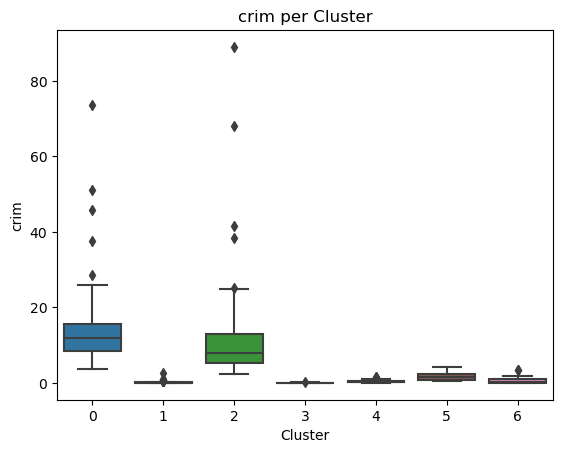

In [14]:
g=sns.boxplot(data=boston_df,y='crim',x='cluster')
g.set_title('crim per Cluster')
g.set_xlabel('Cluster')
g.set_ylabel('crim')